### Brand logo images datasets [Links](http://image.ntua.gr/iva/datasets/flickr_logos/flickr_logos_27_dataset.tar.gz)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
from PIL import Image
import random

sns.set_theme(style="whitegrid")
%matplotlib inline


In [2]:
anatation_file_path = "flickr_logos_27_dataset/flickr_logos_27_dataset_training_set_annotation.txt"
df = pd.read_csv(anatation_file_path,sep=" ",header=0,names=["filename"	,"class","drop_this_row","xmin","ymin","xmax","ymax"],index_col=False)
df.head()

,filename,class,drop_this_row,xmin,ymin,xmax,ymax
0,2451569770.jpg,Adidas,1,242,208,413,331
1,390321909.jpg,Adidas,1,13,5,89,60
2,4761260517.jpg,Adidas,1,43,122,358,354
3,4763210295.jpg,Adidas,1,83,63,130,93
4,4763210295.jpg,Adidas,1,91,288,125,306


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4535 entries, 0 to 4534
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   filename       4535 non-null   object
 1   class          4535 non-null   object
 2   drop_this_row  4535 non-null   int64 
 3   xmin           4535 non-null   int64 
 4   ymin           4535 non-null   int64 
 5   xmax           4535 non-null   int64 
 6   ymax           4535 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 248.1+ KB


In [4]:
df = df.drop("drop_this_row",axis=1)
df.head()

,filename,class,xmin,ymin,xmax,ymax
0,2451569770.jpg,Adidas,242,208,413,331
1,390321909.jpg,Adidas,13,5,89,60
2,4761260517.jpg,Adidas,43,122,358,354
3,4763210295.jpg,Adidas,83,63,130,93
4,4763210295.jpg,Adidas,91,288,125,306


In [5]:
df.shape

(4535, 6)

In [6]:
duplicates = df[df.duplicated()]
duplicates

,filename,class,xmin,ymin,xmax,ymax
29,2451569770.jpg,Adidas,242,208,413,331
30,390321909.jpg,Adidas,13,5,89,60
31,4761260517.jpg,Adidas,43,122,358,354
32,4763210295.jpg,Adidas,83,63,130,93
33,4763210295.jpg,Adidas,91,288,125,306
...,...,...,...,...,...,...
4530,2126991906.jpg,Yahoo,15,6,253,54
4531,217288720.jpg,Yahoo,136,161,304,222
4532,2472817996.jpg,Yahoo,2,4,499,106
4533,2514220918.jpg,Yahoo,1,69,342,157


In [7]:
duplicates.shape

(3274, 6)

In [8]:
print("duplicater rows")
df.loc[df['filename']=="144503924.jpg"]

duplicater rows


,filename,class,xmin,ymin,xmax,ymax
28,144503924.jpg,Adidas,38,12,234,142
62,144503924.jpg,Adidas,38,12,234,142
108,144503924.jpg,Adidas,38,12,234,142
173,144503924.jpg,Adidas,38,12,234,142
243,144503924.jpg,Adidas,38,12,234,142


In [9]:
df_free = df.drop_duplicates(subset=df.columns)
df_free

,filename,class,xmin,ymin,xmax,ymax
0,2451569770.jpg,Adidas,242,208,413,331
1,390321909.jpg,Adidas,13,5,89,60
2,4761260517.jpg,Adidas,43,122,358,354
3,4763210295.jpg,Adidas,83,63,130,93
4,4763210295.jpg,Adidas,91,288,125,306
...,...,...,...,...,...,...
4504,2990076322.jpg,Yahoo,54,2,277,49
4505,3469867139.jpg,Yahoo,108,175,178,201
4506,3469867139.jpg,Yahoo,338,188,424,222
4507,3992886999.jpg,Yahoo,80,194,170,243


### Count the class 

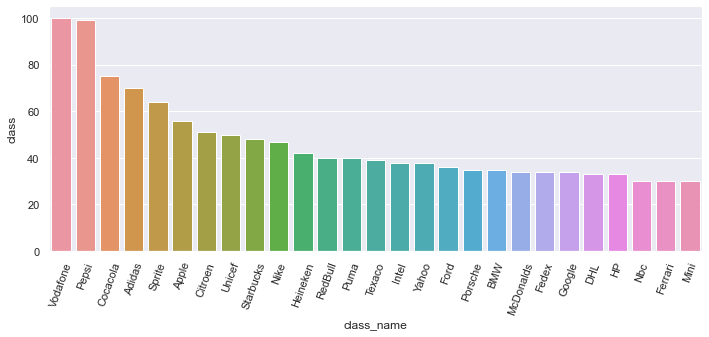

In [10]:
sns.set(rc={'figure.figsize':(11.7,4.5)})
class_df = pd.DataFrame(pd.value_counts(df_free['class']))
class_df['class_name'] = class_df.index
sns.barplot(x="class_name",y='class',data=class_df)
plt.xticks(rotation=70)
plt.show()

### Check Images  Is Present in csv Or Not

In [12]:

img_dir_path = "flickr_logos_27_dataset/flickr_logos_27_dataset_images"
total = 0
for img_ in glob.glob(f"{img_dir_path}/*.jpg"):
    img_name = os.path.basename(img_)
    
    if img_name not in df_free.values:
#         print(img_name)
        total += 1
print(f"The total image bounding box is not present {total}")

The total image bounding box is not present 270


#### Remove from files which images bounding box data not present

In [13]:
for img_ in glob.glob(f"{img_dir_path}/*.jpg"):
    img_name = os.path.basename(img_)
    
    if img_name not in df_free.values:
        os.remove(img_)
print("sucessfully remove images in files")

sucessfully remove images in files


#### i found that one give me lot of error so here i have delect this images and delect form csv

In [14]:
os.remove(f"{img_dir_path}/2662264721.jpg")

In [15]:
df_free.loc[df_free["filename"] == "2662264721.jpg"]

,filename,class,xmin,ymin,xmax,ymax
3246,2662264721.jpg,RedBull,3,197,3,197


In [16]:
df_free = df_free.drop(df_free.loc[df_free["filename"] == "2662264721.jpg"].index)

### Adding width and height in dataframe

In [17]:
path_img = "flickr_logos_27_dataset/flickr_logos_27_dataset_images"
grouped = df_free.groupby('filename')

new_df = pd.DataFrame(columns=['filename','width','height', 'class', 'xmin', 'ymin', 'xmax', 'ymax'])
for img in glob.glob(f"{path_img}/*.jpg"):
    img_name = os.path.basename(img)
    group_df = grouped.get_group(img_name).reset_index()
    group_df = group_df.drop(['index'],axis=1)
    
    img_path = os.path.join(path_img,img_name)
    img = Image.open(img_path)
    width ,height = img.size
    for index,_ in group_df.iterrows():
        group_df.loc[index,'width'] = width
        group_df.loc[index,'height'] = height
    new_df = pd.concat([new_df,group_df])
print("sucessfully added width and height in dataframe")

sucessfully added width and height in dataframe


#### check weather correctly added width and height or not

In [27]:
rand_img_basename = random.choice([os.path.basename(im) for im in glob.glob(f"{path_img}/*.jpg")])
img_path = os.path.join(path_img,rand_img_basename)
img = Image.open(img_path)
width,height = img.size
print(new_df[new_df["filename"] == rand_img_basename])
print(f"orginal width -- {width}  and height -- {height}")

         filename  width  height   class xmin ymin xmax ymax
0  4486111617.jpg  500.0   375.0  Sprite  133   64  333  126
1  4486111617.jpg  500.0   375.0  Sprite  133  156  322  242
2  4486111617.jpg  500.0   375.0  Sprite  164  274  312  320
3  4486111617.jpg  500.0   375.0  Sprite  205    5  254   34
4  4486111617.jpg  500.0   375.0  Sprite  405   37  437   83
5  4486111617.jpg  500.0   375.0  Sprite  450  287  496  337
orginal width -- 500  and height -- 375


In [21]:
new_df.to_csv("clean_data.csv",index=False)